<div style = "text-align:center">
    <h1>Data Cleaning</h1>
</div>

Notes:
- Change the verbage to "I used" and not "We will"

This jupyter notebook goes over the data analysis and cleaning portion of the project. I have written a [python script](Preprocessing.py) to save the functions from this process.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
#Show the first 6 rows.
test.head()

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address
0,22805,19970.0,Ocean View,DE,1.641283e+12,4.0,5.0,4100.0,SINGLE_FAMILY,RECENTLY_SOLD,10454.40,sqft,"37150 Lord Baltimore Ln, Ocean View, DE 19970"
1,18392,27704.0,Durham,NC,1.641542e+12,3.0,4.0,2055.0,SINGLE_FAMILY,RECENTLY_SOLD,0.29,acres,"2011 Woodview Dr, Durham, NC 27704"
2,15215,20733.0,Churchton,MD,1.641542e+12,2.0,3.0,1530.0,SINGLE_FAMILY,RECENTLY_SOLD,4791.60,sqft,"1109 Wildwood Ln, Churchton, MD 20733"
3,20235,33064.0,Pompano Beach,FL,1.641370e+12,1.0,3.0,744.0,SINGLE_FAMILY,RECENTLY_SOLD,6120.00,sqft,"3130 NE 12th Ave, Pompano Beach, FL 33064"
4,13810,6239.0,Killingly,CT,1.640851e+12,3.0,6.0,4166.0,SINGLE_FAMILY,RECENTLY_SOLD,37.00,sqft,"235 Ross Rd, Killingly, CT 06239"


In [7]:
#List the columns in our data
train.columns

Index(['id', 'zipcode', 'city', 'state', 'dateSold', 'bathrooms', 'bedrooms',
       'livingArea', 'homeType', 'homeStatus', 'lotArea', 'lotUnit', 'address',
       'price'],
      dtype='object')

Now we can see the top 5 most common values in each column.

In [8]:
for column in train.columns:
    print(column)
    #value_counts counts how times something appears many and n largest gets the top 5 largest values.
    print(train[column].value_counts().nlargest(5))
    print()

id
20479    1
7329     1
18029    1
18414    1
8249     1
Name: id, dtype: int64

zipcode
82001.0    103
82009.0     68
99504.0     62
99577.0     60
83709.0     56
Name: zipcode, dtype: int64

city
Anchorage       318
Louisville      224
Cheyenne        205
Las Vegas       199
Indianapolis    198
Name: city, dtype: int64

state
CT    938
IN    885
GA    862
DE    845
IA    832
Name: state, dtype: int64

dateSold
1.640851e+12    4724
1.641542e+12    3566
1.641456e+12    2444
1.641370e+12    1870
1.640765e+12    1735
Name: dateSold, dtype: int64

bathrooms
2.0    10563
3.0     6628
1.0     4018
4.0     1643
5.0      294
Name: bathrooms, dtype: int64

bedrooms
3.0    11286
4.0     5751
2.0     4161
5.0     1309
1.0      630
Name: bedrooms, dtype: int64

livingArea
1200.000000    150
1954.681419    117
1800.000000    107
960.000000      96
1400.000000     95
Name: livingArea, dtype: int64

homeType
SINGLE_FAMILY    19067
CONDO             2117
TOWNHOUSE         1922
MULTI_FAMILY       528

Important things to note:
- State, city, # of bedrooms and bathrooms, living area, and home type will probably be the most important categories to include.

- Deal with zipcode later (edit this later).
- Date sold might not be helpful here. These houses should be sold around the same time.
- Some houses haven't even been sold yet. This can skew the data.
- Only 4 types of homes.
- 0 lot area for condos and townhouses. 
- Some of the loat area is measured in sqft while others are measured in acres. 
- The address is too specific.

## Data Cleaning

First we will get rid of the houses that haven't been sold yet. 

In [9]:
#Make a copy of the original data but exclude unsold houses.

train_only_sold = train[train['homeStatus'] == 'RECENTLY_SOLD'].copy()

#Now drop home status column. This column is unnecessary.
#Note: axis = 1 is for columns. axis = 0 is for rows.
train_only_sold = train_only_sold.drop('homeStatus', axis = 1)
train_only_sold.head()

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
5,21279,80241.0,Thornton,CO,1.640851e+12,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


Next we double check the date sold column. If these dates are close enough, then it won't be necessary to include a timeline.

(array([ 120.,   32.,  226.,   79.,  387., 1044., 1618., 1498., 8309.,
        9835.]),
 array([1.6373088e+12, 1.6377408e+12, 1.6381728e+12, 1.6386048e+12,
        1.6390368e+12, 1.6394688e+12, 1.6399008e+12, 1.6403328e+12,
        1.6407648e+12, 1.6411968e+12, 1.6416288e+12]),
 <BarContainer object of 10 artists>)

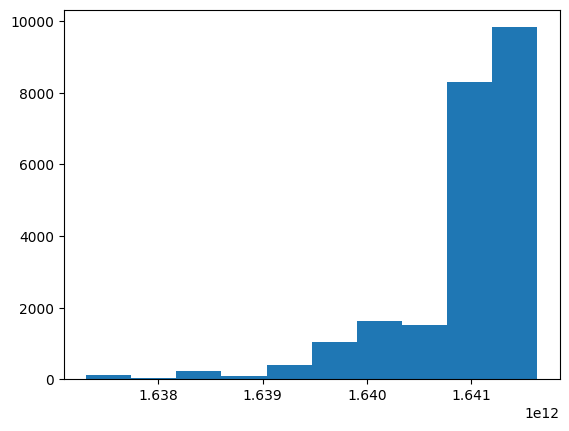

In [10]:
plt.hist(train_only_sold['dateSold'])

From this histogram, we can see that these houses were sold around the same time. Therefore, the date won't effect the prices of the houses. We can drop this column.

In [11]:
#Create another copy of the data.

train_without_date = train_only_sold.drop('dateSold', axis = 1)

train_without_date.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,address,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,"1284 E 130th Ave UNIT A, Thornton, CO 80241",435000.0


Since the address is too specific, we will also drop this column.

In [12]:
train_without_address = train_without_date.drop('address', axis = 1)

train_without_address.head()

,id,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,20479,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,9816,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,4479,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,180,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
5,21279,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


To clean up the data further, we can drop the id too.

In [13]:
train_without_id = train_without_address.drop('id', axis=1)

train_without_id.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,lotUnit,price
0,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,sqft,358100.0
2,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,sqft,660000.0
3,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,sqft,232500.0
4,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,1.83,acres,551900.0
5,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,sqft,435000.0


After getting rid of the unnecessary columns, we can graph all of the numerical columns and look at the distribution of the data. 

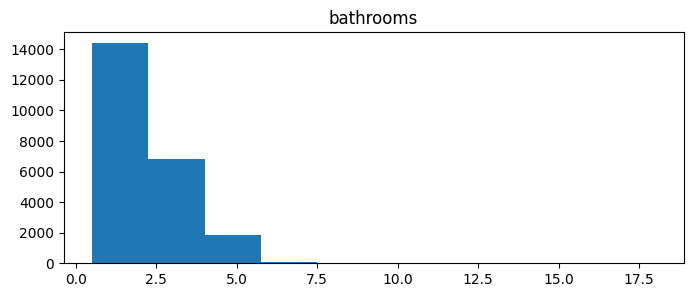

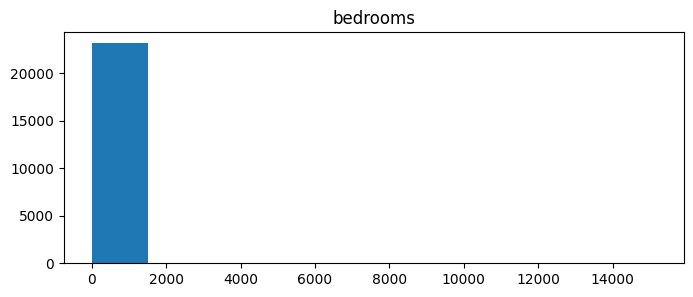

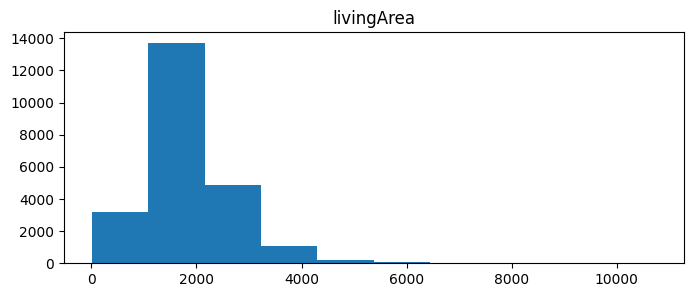

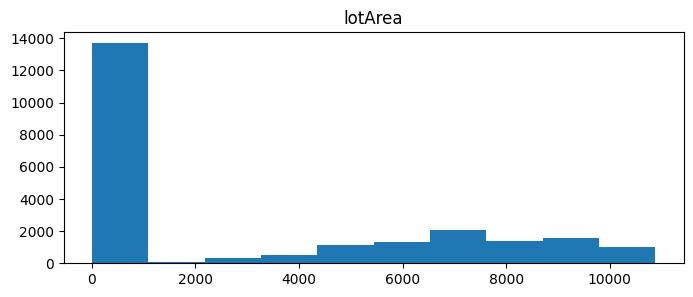

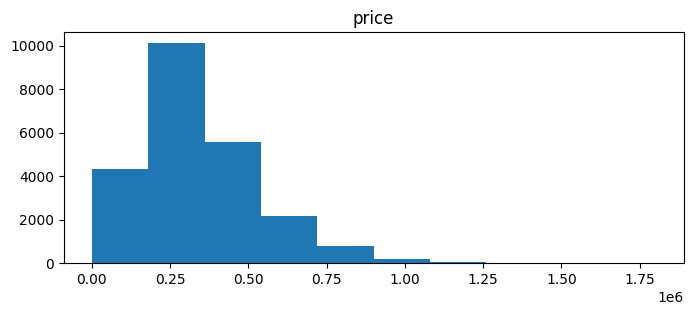

In [14]:
numerical_variables = ['bathrooms', 'bedrooms', 'livingArea', 'lotArea', 'price']


for variable in numerical_variables:
    plt.figure(figsize=(8,3))
    plt.title(variable)
    plt.hist(train_without_id[variable])
    plt.show()

A lot of these graphs are skewed.
- There seems to be a house with 18 bathrooms. 
- There also seems to be a house with a huge amount of bedrooms. 
- The lot area histogram has quite a few conflicting data points. Condos and townhouses don't have any lot area and there are 2 different measurements (sqft and acres). 

Before we deal with the outliers, we have to convert the lot area measurements. Each acre is 43,560 sqft.

In [15]:
#This function will convert acres to sqft. 
def convert_lot_area(row):
    if row['lotUnit'] == 'acres':
        return row['lotArea'] * 43560
    else:
        return row['lotArea']

#Use .apply() to apply the function to the lot area column in the dataframe.  
train_without_id['lotArea'] = train_without_id.apply(convert_lot_area, axis=1)
#Afterwards, drop the lot unit since everything is in sqft.
train_without_id = train_without_id.drop('lotUnit', axis=1)
train_without_id.head()

,zipcode,city,state,bathrooms,bedrooms,livingArea,homeType,lotArea,price
0,76247.0,Justin,TX,3.0,4.0,3078.0,SINGLE_FAMILY,7492.32,358100.0
2,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,SINGLE_FAMILY,6577.56,660000.0
3,99507.0,Anchorage,AK,2.0,3.0,1388.0,CONDO,0.00,232500.0
4,3901.0,Berwick,ME,4.0,3.0,2972.0,SINGLE_FAMILY,79714.80,551900.0
5,80241.0,Thornton,CO,3.0,2.0,1926.0,TOWNHOUSE,0.00,435000.0


(array([20525.,  1294.,   502.,   236.,   175.,   205.,    94.,    46.,
           37.,    34.]),
 array([     0.  ,  43429.32,  86858.64, 130287.96, 173717.28, 217146.6 ,
        260575.92, 304005.24, 347434.56, 390863.88, 434293.2 ]),
 <BarContainer object of 10 artists>)

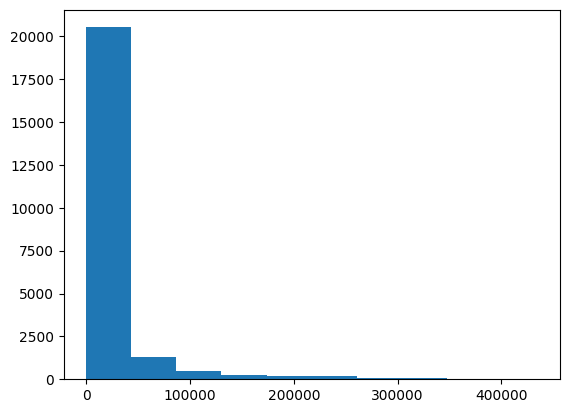

In [16]:
plt.hist(train_without_id['lotArea'])

Even after converting the measurements, the data is still skewed. 

# Statistical Data Analysis
Now we have to deal with the outliers so that the ML algorithm will be more accurate. 

## Numerical Data

In [17]:
train_without_id['bedrooms'] .value_counts()

3.000000        11044
4.000000         5636
2.000000         4095
5.000000         1269
1.000000          612
6.000000          244
3.729905          176
7.000000           34
8.000000           18
9.000000            8
10.000000           5
14.000000           2
12.000000           2
15153.000000        1
33.000000           1
30.000000           1
Name: bedrooms, dtype: int64

We can see now that there is a house with 15,153 bedrooms! The rest of our houses have no where near that many bedrooms. So we will find the mean and calculate 2 standard deviations from the mean and exclude the houses with the number of bedrooms that are outside of this range. 

In [18]:
train_without_id['bedrooms']

0        4.0
2        5.0
3        3.0
4        3.0
5        2.0
        ... 
23628    3.0
23629    3.0
23631    3.0
23632    2.0
23633    2.0
Name: bedrooms, Length: 23148, dtype: float64

In [19]:
train_without_id['bedrooms'].mean()

3.8325325440792666

In [20]:
#Calculate if a house has more or less the amount of bedrooms from the average.
distance_from_mean = np.abs(train_without_id['bedrooms'] - train_without_id['bedrooms'].mean())

distance_from_mean

0        0.167467
2        1.167467
3        0.832533
4        0.832533
5        1.832533
           ...   
23628    0.832533
23629    0.832533
23631    0.832533
23632    1.832533
23633    1.832533
Name: bedrooms, Length: 23148, dtype: float64

In [21]:
#Calculate the # of bedrooms that is 2 standard deviations from the mean.
std_x_3 = train_without_id['bedrooms'].std() * 2

std_x_3

199.1599243007334

We now drop all of the data points outside of this range.

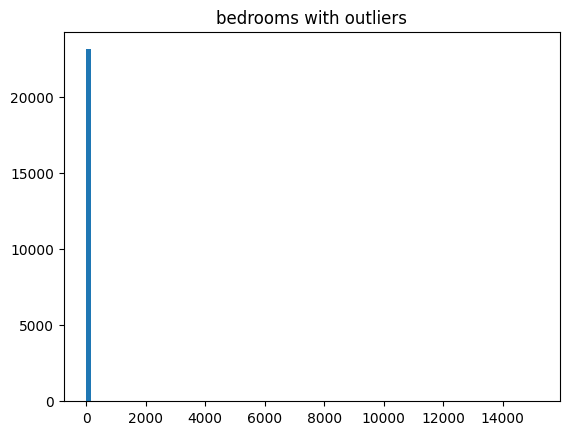

(array([6.1200e+02, 0.0000e+00, 0.0000e+00, 4.0950e+03, 0.0000e+00,
        0.0000e+00, 1.1044e+04, 0.0000e+00, 1.7600e+02, 5.6360e+03,
        0.0000e+00, 0.0000e+00, 1.2690e+03, 0.0000e+00, 0.0000e+00,
        2.4400e+02, 0.0000e+00, 0.0000e+00, 3.4000e+01, 0.0000e+00,
        0.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        8.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

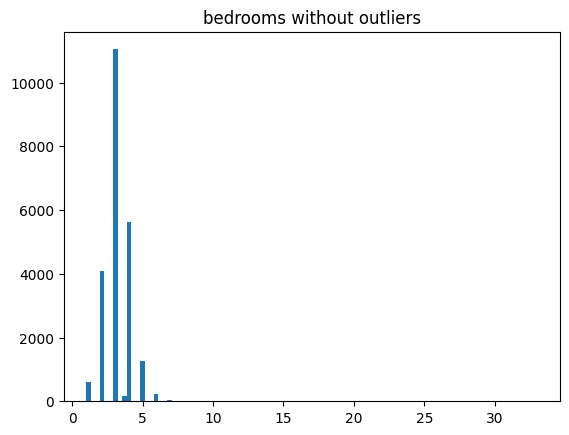

In [22]:
bedrooms_wihtout_outliers = train_without_id[distance_from_mean < std_x_3]['bedrooms']

plt.title('bedrooms with outliers')
plt.hist(train_without_id['bedrooms'], bins=100)
plt.show()

plt.title('bedrooms without outliers')
plt.hist(bedrooms_wihtout_outliers, bins=100)

<AxesSubplot: ylabel='bedrooms'>

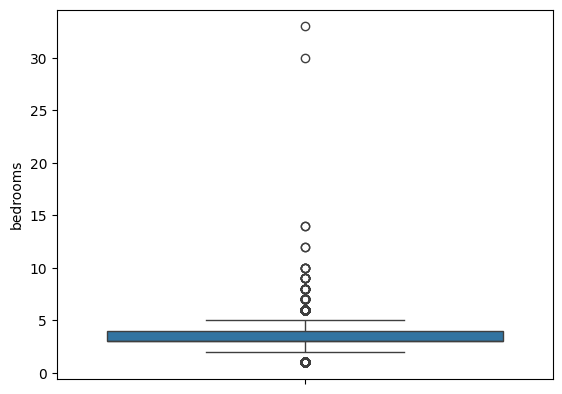

In [23]:
#boxplot
sns.boxplot(bedrooms_wihtout_outliers)

We can also double check for any outliers in our test data.

(array([5.290e+02, 1.206e+03, 6.780e+02, 2.020e+02, 7.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

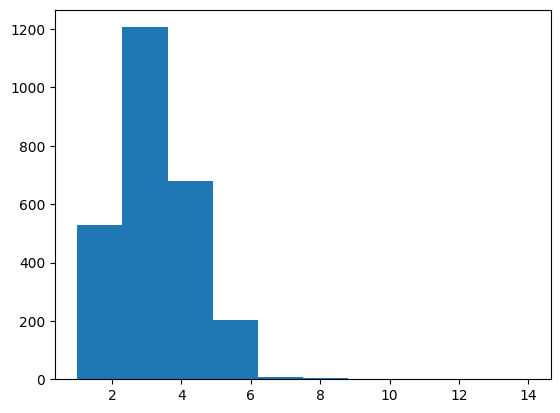

In [29]:
test_distance_from_mean = np.abs(test['bedrooms'] - train_without_id['bedrooms'].mean())

sum(test_distance_from_mean < std_x_3)

plt.hist(test['bedrooms'])

After dropping the outliers from the bedrooms column by calculating the mean and 3 standard deviations from the mean, we can do this with the rest of the numerical columns.

In [34]:
train_no_outliers = train_without_id.copy()

#Fill out any "NA" values with the mean from that column.
train_no_outliers.fillna(train_no_outliers.mean())

#Iterate through every numerical column
for variable in numerical_variables:
    distance_from_mean = np.abs(train_no_outliers[variable].mean() - train_no_outliers[variable])
    #Exclude any data that is greater than 3 stds away from the mean.
    train_no_outliers = train_no_outliers[distance_from_mean < (train_no_outliers[variable].std() * 3)]

#Even after dropping some values, the places with 30 bedrooms are still outliers    
train_no_outliers = train_no_outliers[train_no_outliers['bedrooms'] < 10]

C:\Users\VToml\AppData\Local\Temp\ipykernel_5128\2604093267.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_no_outliers.fillna(train_no_outliers.mean())


We can see how many rows that are dropped after removing the outliers.

In [35]:
print(f'Rows before outlier removal: {len(train_without_id)}')
print(f'Rows after outlier removal: {len(train_no_outliers)}')

Rows before outlier removal: 23148
Rows after outlier removal: 21892


After we clean up the data by dropping outlieres and filling in blank values with the mean, the plots look more normalized.

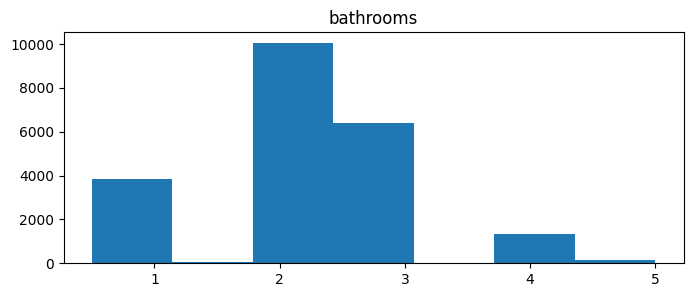

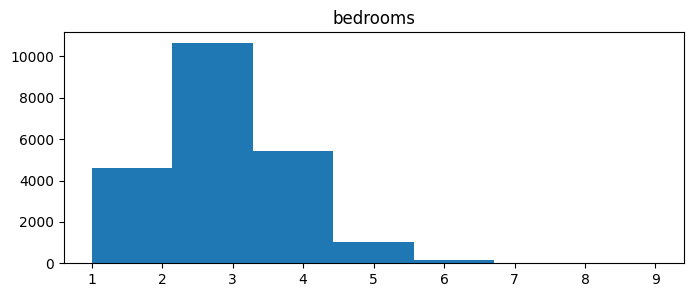

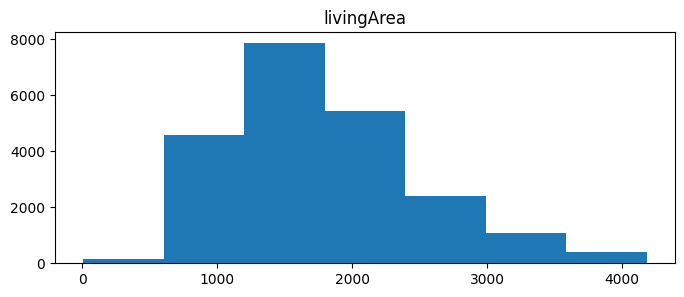

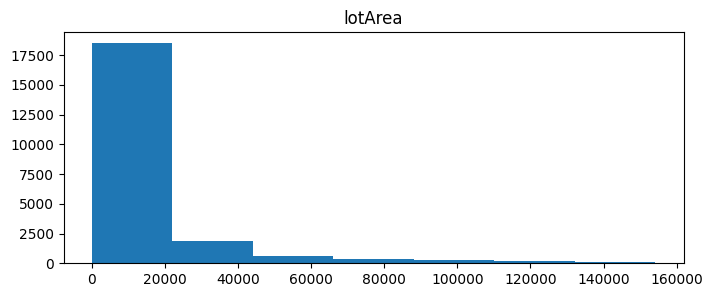

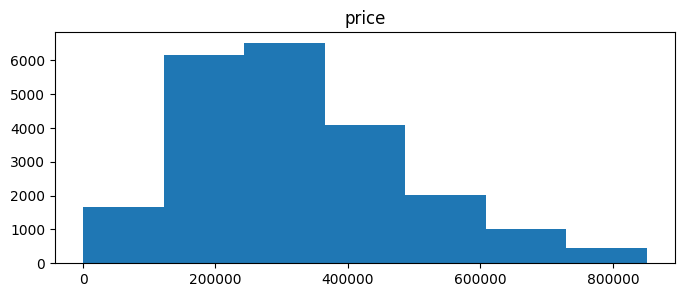

In [32]:
for variable in numerical_variables:
    plt.figure(figsize=(8,3))
    plt.title(variable)
    plt.hist(train_no_outliers[variable], bins=7)
    plt.show()

Notes:
- Univariate analysis is looking at one variable at a time.
- Bivariate looks at 2 variables.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Price (usd)')

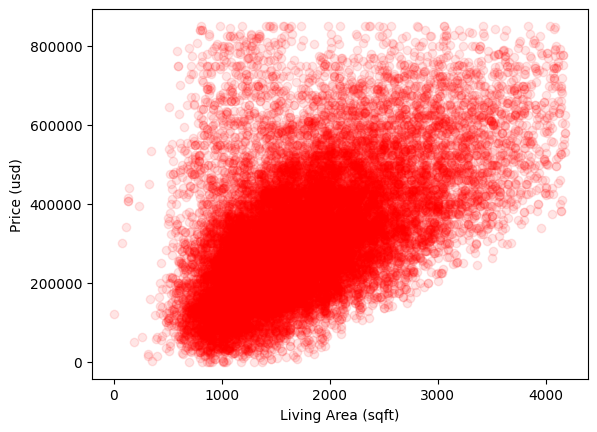

In [36]:
#Scatter plot to show the correlation between living area and price.
plt.scatter(train_no_outliers['livingArea'], train_no_outliers['price'], c=(1, 0, 0, .1))
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (usd)')

C:\Users\VToml\AppData\Local\Temp\ipykernel_5128\3740021036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_no_outliers.corr())


<AxesSubplot: >

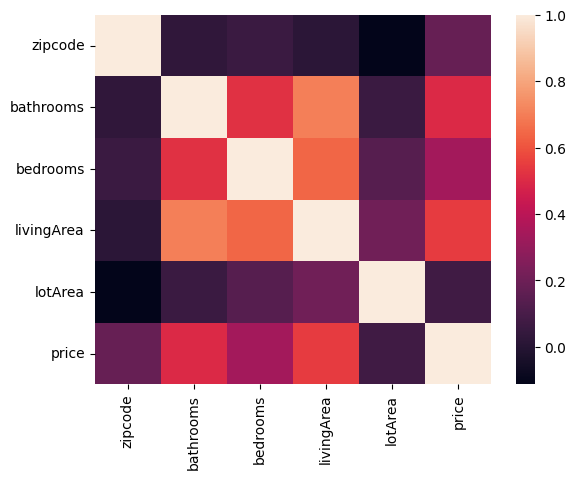

In [37]:
#Heatmap
sns.heatmap(train_no_outliers.corr())

From this heatmap looking specifically at the price, it appears the bathrooms, bedrooms, and living area correlates more to price. Lot area might not seem to correlate as strongly since condos and townhomes without any lot area can be just as expensive as a multi family home with a giant lot area. 

## Categorical Data

- State
- City
- Zip code
- Home type

I used one hot encoding for the home type column since there are only 4 types of homes.

In [39]:
#Use pandas get_dummies.
train_one_hot = pd.get_dummies(train_no_outliers, columns=['homeType'])

train_one_hot

,zipcode,city,state,bathrooms,bedrooms,livingArea,lotArea,price,homeType_CONDO,homeType_MULTI_FAMILY,homeType_SINGLE_FAMILY,homeType_TOWNHOUSE
0,76247.0,Justin,TX,3.0,4.0,3078.0,7492.32,358100.0,0,0,1,0
2,85340.0,Litchfield Park,AZ,5.0,5.0,3722.0,6577.56,660000.0,0,0,1,0
3,99507.0,Anchorage,AK,2.0,3.0,1388.0,0.00,232500.0,1,0,0,0
4,3901.0,Berwick,ME,4.0,3.0,2972.0,79714.80,551900.0,0,0,1,0
5,80241.0,Thornton,CO,3.0,2.0,1926.0,0.00,435000.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23628,31204.0,Macon,GA,2.0,3.0,2428.0,7840.80,175000.0,0,0,1,0
23629,2907.0,Providence,RI,2.0,3.0,1600.0,3600.00,305000.0,0,0,1,0
23631,85302.0,Glendale,AZ,2.0,3.0,1605.0,6150.00,305000.0,0,0,1,0
23632,85138.0,Maricopa,AZ,2.0,2.0,1810.0,8713.00,360000.0,0,0,1,0


However, with 51 states (DC included here), I looked at how expensive the state itself is and aggregated the average home price from each state.

In [42]:
len(train['state'].unique())
#.groupby will group by the state.
average_home_prices_by_state = train.groupby('state')['price'].mean()
average_home_prices_by_state

state
AK    350993.176935
AL    296515.203704
AR    222161.914791
AZ    417159.360704
CA    731229.226463
CO    491290.584071
CT    315039.484009
DC    704194.956250
DE    329241.953846
FL    361734.497645
GA    293328.443155
HI    763766.724739
IA    199066.828125
ID    459733.763838
IL    265560.855932
IN    231222.072316
KS    281114.579639
KY    248763.043760
LA    224563.136519
MA    527710.215311
MD    382338.917702
ME    301032.711864
MI    216864.962712
MN    309716.613583
MO    259985.297735
MS    227098.814815
MT    456386.060606
NC    328279.006920
ND    274213.919003
NE    271760.229885
NH    388714.417127
NJ    369606.590674
NM    362957.915556
NV    422220.690176
NY    396831.922680
OH    216212.402469
OK    229277.457064
OR    496558.652542
PA    270093.492255
RI    379734.503448
SC    322845.923274
SD    260359.309917
TN    332692.970696
TX    350814.900709
UT    502741.729097
VA    389874.260776
VT    337284.995381
WA    568415.784404
WI    255102.826347
WV    218378.7

In [43]:
#Merge these datasets on state.
train = train.merge(average_home_prices_by_state, how='left', on='state')
train

,id,zipcode,city,state,dateSold,bathrooms,bedrooms,livingArea,homeType,homeStatus,lotArea,lotUnit,address,price_x,price_y
0,20479,76247.0,Justin,TX,1.641456e+12,3.0,4.0,3078.0,SINGLE_FAMILY,RECENTLY_SOLD,7492.32,sqft,"1937 Caddo Springs Dr, Justin, TX 76247",358100.0,350814.900709
1,13019,6070.0,Simsbury,CT,1.641283e+12,3.0,3.0,2200.0,CONDO,PENDING,0.00,sqft,"18 Brettonwood Dr, Simsbury, CT 06070",399900.0,315039.484009
2,9816,85340.0,Litchfield Park,AZ,1.641370e+12,5.0,5.0,3722.0,SINGLE_FAMILY,RECENTLY_SOLD,6577.56,sqft,"14584 W Hidden Terrace Loop, Litchfield Park, ...",660000.0,417159.360704
3,4479,99507.0,Anchorage,AK,1.641370e+12,2.0,3.0,1388.0,CONDO,RECENTLY_SOLD,0.00,sqft,"2903 Suncatcher Ct, Anchorage, AK 99507",232500.0,350993.176935
4,180,3901.0,Berwick,ME,1.640905e+12,4.0,3.0,2972.0,SINGLE_FAMILY,RECENTLY_SOLD,1.83,acres,"32 Tyler Ln, Berwick, ME 03901",551900.0,301032.711864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,21575,2907.0,Providence,RI,1.640678e+12,2.0,3.0,1600.0,SINGLE_FAMILY,RECENTLY_SOLD,3600.00,sqft,"246 Roger Williams Ave, Providence, RI 02907",305000.0,379734.503448
23630,5390,21703.0,Frederick,MD,1.641197e+12,2.0,3.0,1232.0,SINGLE_FAMILY,PENDING,0.94,acres,"3039 Ballenger Creek Pike, Frederick, MD 21703",290000.0,382338.917702
23631,860,85302.0,Glendale,AZ,1.641370e+12,2.0,3.0,1605.0,SINGLE_FAMILY,RECENTLY_SOLD,6150.00,sqft,"6614 W Golden Ln, Glendale, AZ 85302",305000.0,417159.360704
23632,15795,85138.0,Maricopa,AZ,1.641456e+12,2.0,2.0,1810.0,SINGLE_FAMILY,RECENTLY_SOLD,8713.00,sqft,"19721 N Flamingo Rd, Maricopa, AZ 85138",360000.0,417159.360704
